# Deutsch–Jozsa Algorithm

Deutsch–Jozsa 알고리즘은 주어진 함수가 상수 함수인지 균형 함수인지 단 한 번의 함수 호출만으로 판별할 수 있는 양조 알고리즘이다.

주어진 함수 f:{0,1}^n →{0,1}가 상수 함수인지 균형 함수인지 판단한다.

## 1. Import Libraries

In [2]:
!pip install "qiskit[visualization]" qiskit-aer --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 82.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 73.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 62.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 8.6 MB/s eta 0:00:00


In [8]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

## 2. Oracle Definitions  
상수 함수와 균형 함수에 대한 Oracle(오라클)을 정의해야 한다.

오라클이란, 특정 함수 f(x)를 양자 회로 내에서 계산하는 **블랙박스 연산자**를 의미한다.  
입력을 넣으면 결과를 알려주지만, 내부 구조는 알 수 없는 연산자로,  
양자 알고리즘에서는 이 오라클을 한 번만 호출하고도 문제를 해결하는 것이 핵심이다.

- **상수 함수 오라클**: 입력에 상관없이 항상 같은 출력을 반환 (예: 항상 0)
- **균형 함수 오라클**: 입력의 절반에는 0, 절반에는 1을 반환 (예: XOR 기반)

이 두 가지 형태의 오라클을 정의하고, Deutsch–Jozsa 알고리즘을 통해 어떤 종류인지 판별할 수 있다.


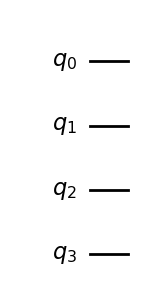

In [18]:
# 주어진 n비트 입력에 대해 항상 출력이 0이 되는 상수 함수 오라클
def constant_oracle(n):
    # 입력 큐비트 n개와 출력 큐비트 1개를 포함하는 양자 회로 생성
    qc = QuantumCircuit(n + 1)

    # 출력 큐비트에 아무 연산도 하지 않으므로, 항상 0을 출력 (즉, f(x)=0인 상수 함수)
    return qc

qc = constant_oracle(3)
qc.draw('mpl')

## 코드 요약 및 해설

- 이 함수는 **Deutsch–Jozsa 알고리즘에서 사용할 "상수 함수 오라클"**을 생성한다다.
- 오라클은 입력값이 무엇이든 **항상 같은 출력값 (여기선 0)** 을 반환하는 함수이다.
- 이 구현에서는 출력 큐비트에 **아무 연산도 하지 않음**으로써, f(x) = 0이 되도록 한다.

---

## Addition

### 1. 회로 구성

- 총 `n + 1`개의 큐비트를 사용
  - 앞의 `n`개는 입력 큐비트
  - 마지막 1개는 출력 큐비트

### 2. 상수 함수 오라클의 동작 원리

- 출력 큐비트에 어떤 게이트도 적용하지 않음
  - 즉, 출력은 항상 `|0⟩` 상태 유지
  - 결과적으로 f(x) = 0인 **항등 함수** 역할을 함
- 이 방식은 Deutsch–Jozsa 알고리즘에서 **상수 함수인 경우의 대표 예시**로 자주 사용됩니다.




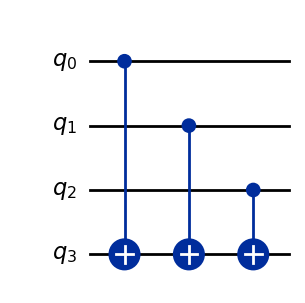

In [20]:
# 입력값의 parity(짝수/홀수 여부)에 따라 출력 큐비트를 반전시키는 균형 함수 오라클
def balanced_oracle(n):
    # 입력 큐비트 n개와 출력 큐비트 1개를 포함하는 양자 회로 생성
    qc = QuantumCircuit(n + 1)

    # 입력 큐비트 각각을 출력 큐비트에 대해 CNOT 게이트로 연결 (결과적으로 출력 큐비트는 입력 큐비트들의 XOR 결과)
    for i in range(n):
        qc.cx(i, n)
    return qc

qc = balanced_oracle(3)
qc.draw('mpl')

## 코드 요약 및 해설

- 이 함수는 **Deutsch–Jozsa 알고리즘에서 사용할 "균형 함수 오라클"**을 생성한다.  
- 오라클은 입력값에 따라 출력값이 바뀌되, 전체 입력 중 절반에 대해 0, 절반에 대해 1을 반환하는 함수이다.  
- 이 구현에서는 입력 큐비트 각각을 출력 큐비트에 CNOT 게이트로 연결함으로써,  
  출력 큐비트가 입력의 패리티(parity) — 즉, XOR 결과 — 에 따라 0 또는 1이 되도록 한다.

---

## Addition

### 1. 회로 구성

- 총 `n + 1`개의 큐비트를 사용
  - 앞의 `n`개는 입력 큐비트
  - 마지막 1개는 출력 큐비트

### 2. 균형 함수 오라클의 동작 원리

- 각 입력 큐비트를 출력 큐비트에 대해 CNOT 게이트로 연결
  - CNOT는 제어 큐비트가 1일 때 대상 큐비트를 반전시킴
- 결과적으로 출력 큐비트는 다음과 같은 상태가 됨(XOR):
  - `f(x) = x₀ ⊕ x₁ ⊕ ... ⊕ xₙ₋₁`
- 이 함수는 전체 입력의 절반에서는 0, 절반에서는 1을 반환하기 때문에  
  **Deutsch–Jozsa 알고리즘의 균형 함수 조건을 만족**함


## 3. Deutsch–Jozsa Circuit

In [25]:
# Deutsch–Jozsa 알고리즘 회로를 구성하는 함수
def deutsch_jozsa_circuit(oracle, n):
    # 입력 큐비트 n개 + 출력 큐비트 1개, 총 n+1개의 큐비트로 회로 생성
    # 측정을 위해 입력 큐비트 n개 만큼 고전 비트 생성
    qc = QuantumCircuit(n + 1, n)

    # 출력 큐비트를 |1> 상태로 초기화 (X게이트 활용)
    qc.x(n)

    # 모든 큐비트에 Hadamard 게이트 적용하여 균등 중첩 상태로
    qc.h(range(n + 1))

    # 입력 및 출력에 작용하는 oracle 회로를 현재 회로에 합성
    qc.compose(oracle, inplace=True)

    # 다시 모든 큐비트에 Hadamard 게이트 적용
    qc.h(range(n))

    # 입력 큐비트만 측정하여 결과를 고전 비트에 저장
    qc.measure(range(n), range(n))
    return qc

## 코드 요약 및 해설

- 이 함수는 Deutsch–Jozsa 알고리즘의 전체 양자 회로를 구성하는 함수이다.
- 주어진 함수가 입력에 상관없이 항상 같은 값을 출력하는 "상수 함수"인지,  
  혹은 입력의 절반은 0, 절반은 1을 출력하는 "균형 함수"인지 구별하는 것이 목적이다.  
- Hadamard 게이트를 통해 입력 큐비트를 중첩 상태로 만든 후, 오라클을 적용하고 다시 Hadamard를 적용해  
  간섭 결과를 측정하여 함수의 특성을 판단한다.

---

## Addition

### 1. 각 게이트 정리

- **X 게이트**: 0과 1 상태를 반전시키는 NOT 게이트
- **H 게이트 (Hadamard)**: 입력을 모든 상태의 중첩으로 만드는 게이트
- **측정 (measure)**: 양자 상태를 고전적 비트로 변환

---

### 2. 알고리즘 회로 구성 단계

#### ① 출력 큐비트 초기화
- `qc.x(n)`을 사용하여 출력 큐비트를 1로 설정
- 이후 Hadamard 게이트를 적용하면 위상 반전을 위한 상태가 됨

#### ② Hadamard 게이트 적용
- `qc.h(range(n + 1))`: 모든 큐비트를 중첩 상태로 변환
  - 입력 큐비트는 모든 가능한 입력의 중첩
  - 출력 큐비트는 위상 정보를 줄 수 있는 상태로 변환

#### ③ 오라클 적용
- `qc.compose(oracle, inplace=True)`를 통해 오라클 회로를 삽입
- 오라클은 특정 입력에 대해 출력 큐비트의 위상을 반전시킴

#### ④ 두 번째 Hadamard 적용
- `qc.h(range(n))`: 입력 큐비트에 다시 Hadamard를 적용
- 간섭 효과로 인해 특정 상태의 진폭만 남고 나머지는 사라짐

#### ⑤ 측정
- `qc.measure(range(n), range(n))`: 입력 큐비트를 측정하여 결과 확인
- 출력 큐비트는 측정하지 않아도 됨

---

### 3. 최종 결과 해석

- 측정 결과가 `000`이면 → **상수 함수**
- 측정 결과가 `000`이 아니면 → **균형 함수**

- 단 한 번의 회로 실행으로 함수의 성질을 판별할 수 있어, 고전 알고리즘보다 훨씬 효율적이다.


In [ ]:
n=3

## 4. Run with Constant Oracle

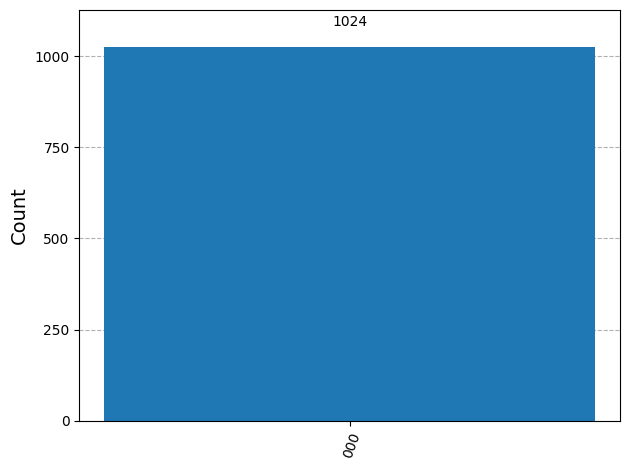

In [30]:
# 상수 함수 오라클 생성
oracle = constant_oracle(n)

# 오라클이 포함된 Deutsch–Jozsa 알고리즘 회로 생성
qc = deutsch_jozsa_circuit(oracle, n)

# 최신 시뮬레이터 생성 및 실행
simulator = AerSimulator()
job = simulator.run(qc, shots=1024)
result = job.result()
counts = result.get_counts()

# 결과 시각화
plot_histogram(counts)

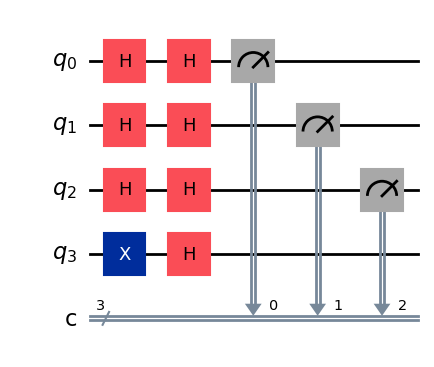

In [31]:
qc.draw('mpl')

## 코드 요약 및 해설

- 이 코드는 **상수 함수 오라클**을 사용한 Deutsch–Jozsa 알고리즘의 전체 실행 과정이다.
- 상수 함수 오라클은 어떤 입력이 들어와도 항상 출력이 0이 되는 함수 f(x) = 0을 시뮬레이션한다.
- 알고리즘은 이 오라클을 포함한 양자 회로를 구성하고, Qiskit의 시뮬레이터로 1024번 실행한 후 측정 결과를 시각화한다.

---

## Addition

### 1. 회로 구성

- 회로에는 총 4개의 큐비트가 사용된다. (입력 큐비트 3개 + 출력 큐비트 1개)
- 전체 흐름:
  1. 출력 큐비트를 `|1⟩` 상태로 만들기 위해 X 게이트 적용
  2. 모든 큐비트에 Hadamard 게이트 적용 → 입력: 중첩, 출력: `|−⟩` 상태
  3. 오라클 (constant_oracle): 아무 연산도 하지 않음
  4. 다시 입력 큐비트에 Hadamard 적용 → 간섭 효과로 진폭 정리
  5. 입력 큐비트를 측정하여 결과 확인

### 2. 오라클의 동작 원리

- `constant_oracle(n)`은 출력 큐비트에 아무 게이트도 적용하지 않는다.
- 따라서 f(x) = 0인 상수 함수로 동작한다.
- 위상 반전이 발생하지 않으므로, 간섭 결과가 `|000⟩`에 집중된다.

## 5. Run with Balanced Oracle

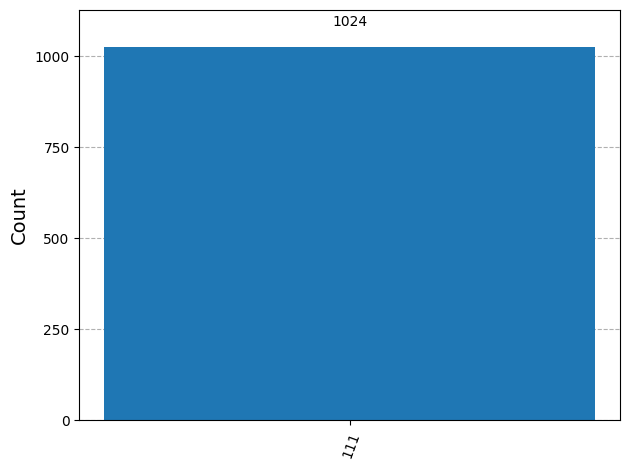

In [42]:
# 균형 함수 오라클 생성
oracle = balanced_oracle(n)

# 오라클이 포함된 Deutsch–Jozsa 알고리즘 회로 생성
qc = deutsch_jozsa_circuit(oracle, n)

# AerSimulator를 이용한 실행
simulator = AerSimulator()
job = simulator.run(qc, shots=1024)
result = job.result()
counts = result.get_counts()

# 결과 시각화
plot_histogram(counts)

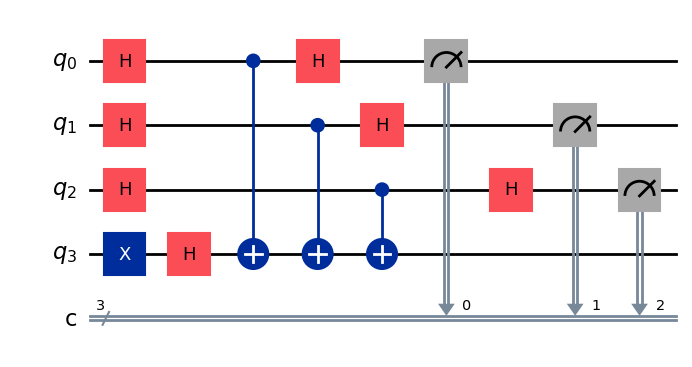

In [34]:
qc.draw('mpl')

## 코드 요약 및 해설

- 이 코드는 **균형 함수 오라클**을 사용한 Deutsch–Jozsa 알고리즘의 전체 실행 과정이다.
- 균형 함수 오라클은 입력의 절반에 대해 0, 절반에 대해 1을 반환하는 함수 f(x) = x₀ ⊕ x₁ ⊕ ... ⊕ xₙ₋₁를 시뮬레이션한다.
- 알고리즘은 이 오라클을 포함한 양자 회로를 구성하고, Qiskit의 시뮬레이터로 1024번 실행한 후 측정 결과를 시각화한다.

---

## Addition

### 1. 회로 구성

- 회로에는 총 4개의 큐비트가 사용된다. (입력 큐비트 3개 + 출력 큐비트 1개)
- 전체 흐름:
  1. 출력 큐비트를 `|1⟩` 상태로 만들기 위해 X 게이트 적용
  2. 모든 큐비트에 Hadamard 게이트 적용 → 입력: 중첩, 출력: `|−⟩` 상태
  3. 오라클 (balanced_oracle): 각 입력 큐비트를 제어 큐비트로 하여 출력 큐비트에 CNOT 게이트 적용  
     → 결과적으로 출력 큐비트는 입력 비트들의 XOR 결과가 됨
  4. 다시 입력 큐비트에 Hadamard 적용 → 간섭 효과 발생
  5. 입력 큐비트를 측정하여 결과 확인

### 2. 오라클의 동작 원리

- `balanced_oracle(n)`은 입력 큐비트 각각을 출력 큐비트에 대해 제어 큐비트로 연결한다.
- 출력 큐비트는 입력값의 패리티 (XOR 결과)에 따라 0 또는 1로 반전된다.
- 이로 인해 입력 상태의 일부에 위상 반전이 일어나며, 다시 Hadamard를 적용하면 `|000⟩` 상태가 사라지고 다른 값(예: `111`)에 진폭이 집중된다.


## 6. 요약

Deutsch–Jozsa 알고리즘은 고전적인 방법으로는 지수적으로 많은 함수 호출이 필요한 문제를  
**단 한 번의 오라클 호출만으로 해결할 수 있다는 점에서 양자 우위(Quantum Advantage)**를 잘 보여준다.

이 알고리즘은 함수가 상수 함수인지 균형 함수인지를 판별하는 문제를 다루며,  
고전 알고리즘은 최악의 경우 \(2^{n-1} + 1\)번의 함수 호출이 필요하지만,  
양자 알고리즘은 중첩과 간섭을 활용하여 단 한 번의 오라클 호출로 판별이 가능하다.

이를 통해 양자 컴퓨팅이 특정 문제에서 고전 컴퓨팅보다 **압도적으로 효율적**일 수 있음을 입증한다.
